[!images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCOiT0pGJg4wDFQAAAAAdAAAAABA3]

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

--> My task is to conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

# 1. Import the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Churn-Dataset.csv')

# 2. Data preparation & Cleaning

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [16]:
df['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [17]:
df['Churn'] = df['Churn'].apply(lambda x:1 if x.lower() == 'yes' else 0 )

In [18]:
change_cols = ['Partner', 'Dependents', 'PaperlessBilling']
for col in change_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [24]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,No,No,One year,0,Mailed check,56.95,1889.5,0,0,0
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,0,0,1
3,7795-CFOCW,1,0,0,0,45,No,No phone service,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,3,0
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,0,0,1
5,9305-CDSKC,0,0,0,0,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.5,0,0,1
6,1452-KIOVK,1,0,0,1,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,0,0
7,6713-OKOMC,0,0,0,0,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,0,Mailed check,29.75,301.9,0,0,0
8,7892-POOKP,0,0,1,0,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,0,2,1
9,6388-TABGU,1,0,0,1,62,Yes,No,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0,0,0


# 3. Exploratory Data Analysis

## **Basic Stats**

In [25]:
#check basic statistics
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,numAdminTickets,numTechTickets,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,0.515689,0.419566,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,1.275299,1.250117,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,5.000000,9.000000,1.000000


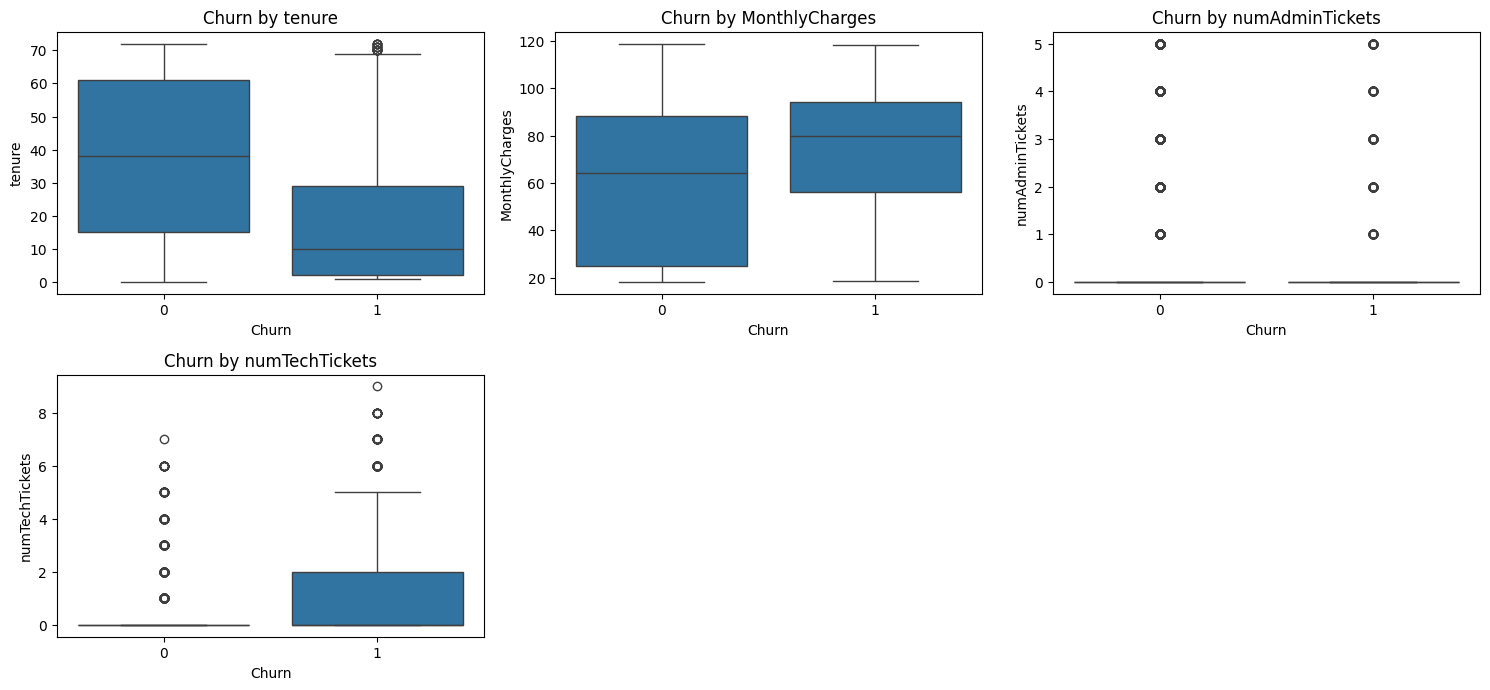

In [26]:
# Numerical variables - compare distributions
numerical_cols = ['tenure', 'MonthlyCharges', 'numAdminTickets',
                 'numTechTickets']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'Churn by {column}')
plt.tight_layout()
plt.show()


In [30]:
# List of categorical columns
categorical_cols = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'Contract', 'PaymentMethod' ]

# Display frequency counts for each categorical column
for col in categorical_cols:
    print(f"Frequency counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Frequency counts for Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64


Frequency counts for gender:
gender
1    3555
0    3488
Name: count, dtype: int64


Frequency counts for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Frequency counts for Partner:
Partner
0    3641
1    3402
Name: count, dtype: int64


Frequency counts for Dependents:
Dependents
0    4933
1    2110
Name: count, dtype: int64


Frequency counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Frequency counts for PaperlessBilling:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


Frequency counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Frequency counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Frequency counts for OnlineSecurity:
OnlineSecurity
No     

# 4. Churn Analysis

In [31]:
overall_churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.54%


In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [33]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


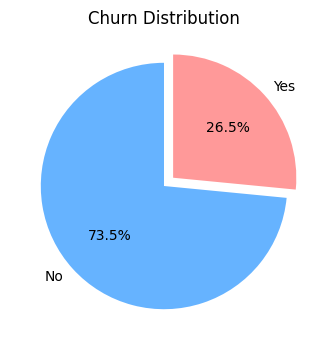

In [38]:
# Get churn counts
churn_counts = df['Churn'].value_counts()

# Define your mapping
churn_labels = {0: 'No', 1: 'Yes'}

# Define explode (still exploding the "Yes" slice)
explode = (0, 0.1)

# Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ['No', 'Yes']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999'],
        explode=explode)
plt.title('Churn Distribution')
plt.show()

# **4.1 Customer demographic**

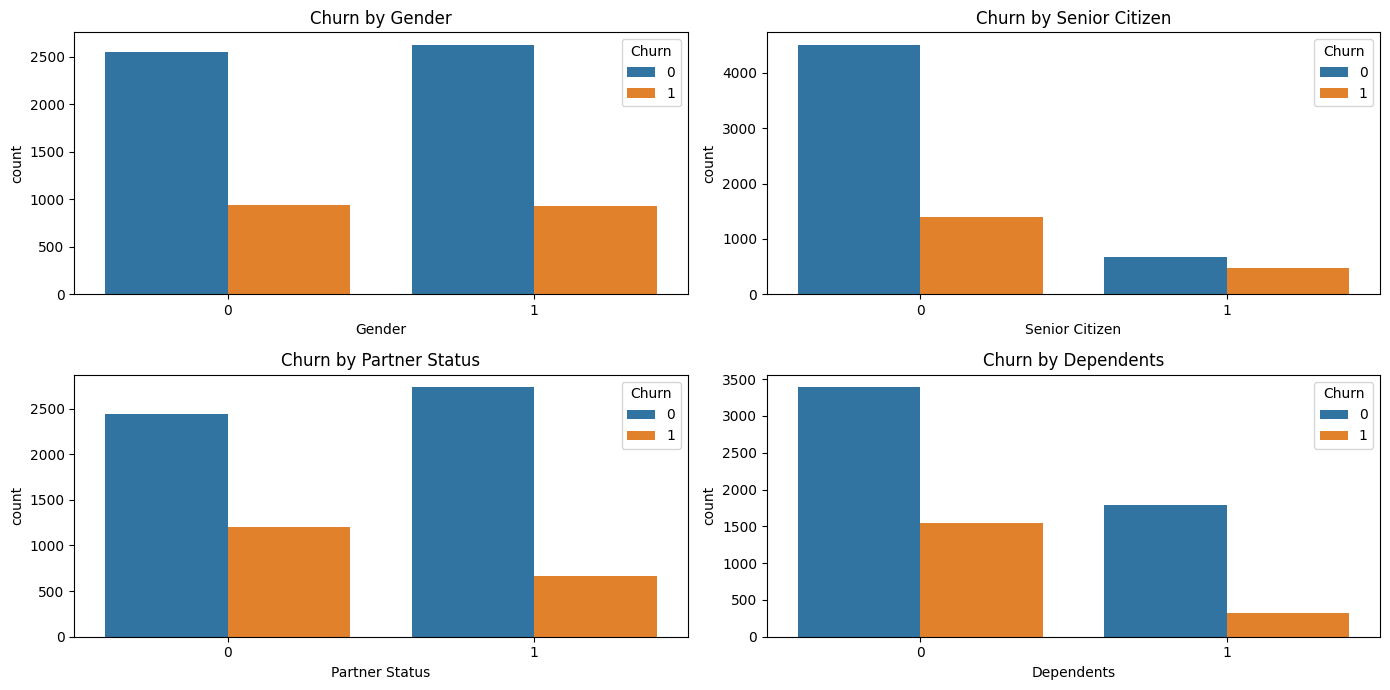

In [76]:
plt.figure(figsize=(14, 7))

# Subplot 1: Churn by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.xlabel('Gender')
plt.title('Churn by Gender')

# Subplot 2: Churn by Senior Citizen
plt.subplot(2, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.xlabel('Senior Citizen')
plt.title('Churn by Senior Citizen')

# Subplot 3: Churn by Partner Status
plt.subplot(2, 2, 3)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.xlabel('Partner Status')
plt.title('Churn by Partner Status')

# Subplot 4: Churn by Dependents
plt.subplot(2, 2, 4)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.xlabel('Dependents')
plt.title('Churn by Dependents')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Churn by Tenure')

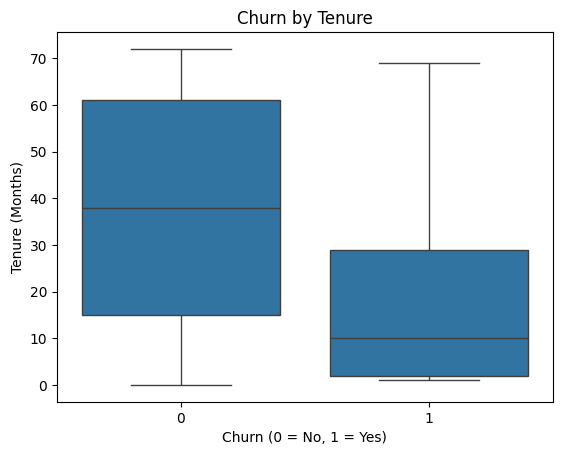

In [67]:
sns.boxplot(x = 'Churn',
            y = 'tenure',
            data = df,
            fliersize = 0)

plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.title("Churn by Tenure")


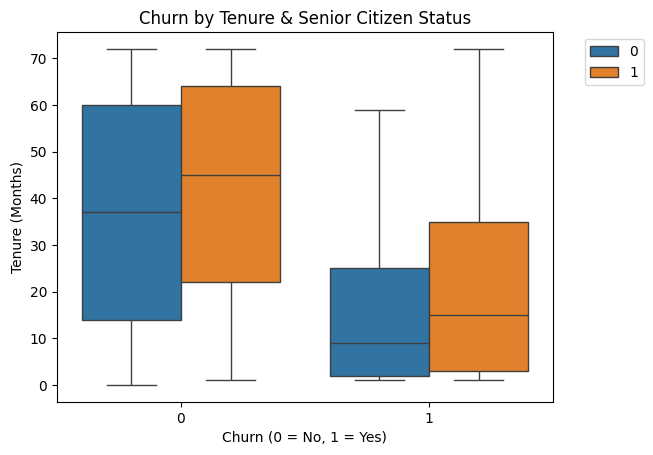

In [66]:
sns.boxplot(x = 'Churn',
            y = 'tenure',
            data = df,
            fliersize = 0,
            hue = "SeniorCitizen")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.title("Churn by Tenure & Senior Citizen Status")

plt.show()

# **4.2 Service usage and Billings**

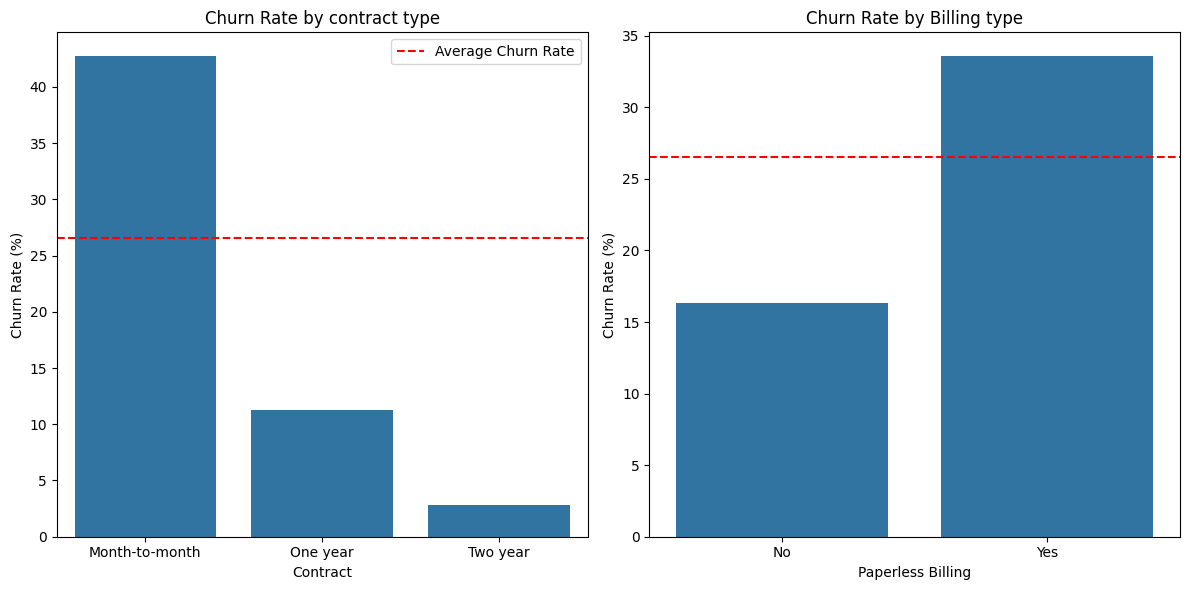

In [95]:
# Calculate churn rate by contract
contract_churn = df.groupby('Contract')['Churn'].agg(['mean', 'count'])
contract_churn['churn_rate'] = contract_churn['mean'] * 100
contract_churn = contract_churn.sort_values('churn_rate', ascending=False)

# Calculate churn rate by billing types
bill_churn = df.groupby('PaperlessBilling')['Churn'].agg(['mean', 'count'])
bill_churn['churn_rate'] = bill_churn['mean'] * 100
bill_churn = bill_churn.sort_values('churn_rate', ascending=False)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=contract_churn.index, y='churn_rate', data=contract_churn)
plt.title('Churn Rate by contract type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract')
plt.xticks(rotation=0)
plt.axhline(y=df['Churn'].mean()*100, color='r', linestyle='--', label='Average Churn Rate')
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(x=bill_churn.index, y='churn_rate', data=bill_churn)
plt.title('Churn Rate by Billing type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Paperless Billing')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.axhline(y=df['Churn'].mean()*100, color='r', linestyle='--', label='Average Churn Rate')

plt.tight_layout()
plt.show()



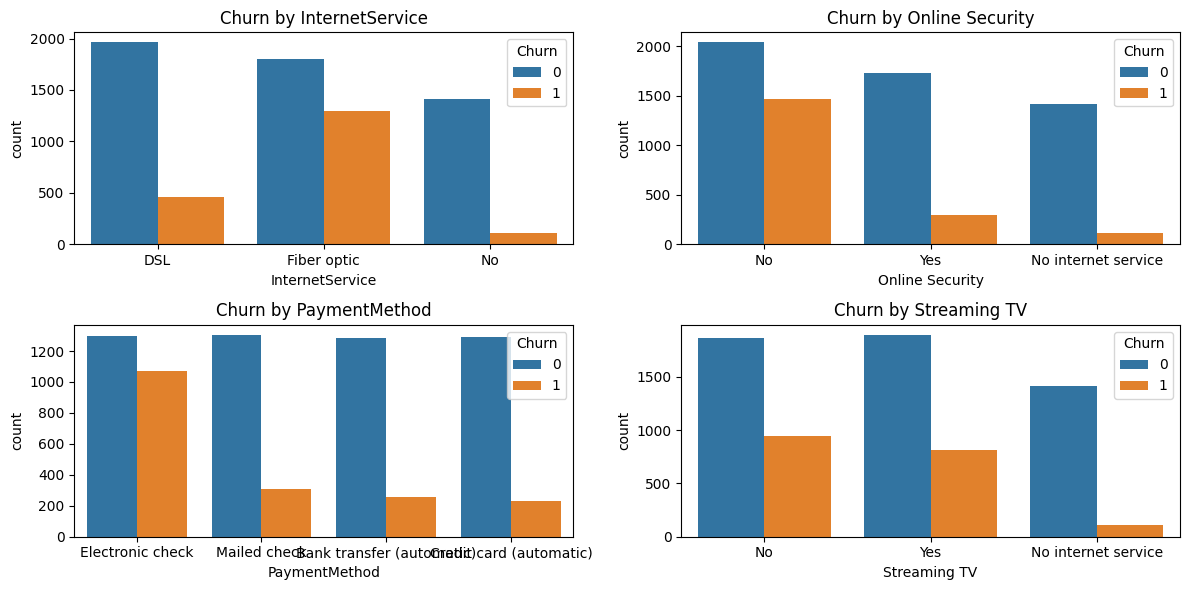

In [79]:
# Plot categorical relationships
plt.figure(figsize=(12, 6))

# Churn by Internet Service
plt.subplot(2, 2, 1)
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.xlabel('InternetService')
plt.title('Churn by InternetService')

# Churn by OnlineSecurity
plt.subplot(2, 2, 2)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.xlabel('Online Security')
plt.title('Churn by Online Security')

# Churn by Payment Method
plt.subplot(2, 2, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xlabel('PaymentMethod')
plt.title('Churn by PaymentMethod')

# Churn by Streaming TV
plt.subplot(2, 2, 4)
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.xlabel('Streaming TV')
plt.title('Churn by Streaming TV')

plt.tight_layout()
plt.show()

# 5. Feature Correlations












In [ ]:
# Correlation matrix
correlation = df.drop(['State', 'Area_Code', 'Phone'], axis=1)
correlation = pd.get_dummies(correlation, drop_first=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 6. Feature Engineering

# 7. Modelling


# 8. Model Evaluation

# 9. Insights and Recommendations